In [78]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
from scipy.stats import norm, lognorm
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [79]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("data/led.csv") # Had to add this to fix the error I was getting
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


/var/folders/h0/t0s9plpn04z9byscxjm6l1fr0000gn/T/ipykernel_42341/2886067802.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
/var/folders/h0/t0s9plpn04z9byscxjm6l1fr0000gn/T/ipykernel_42341/2886067802.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futur

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [80]:
#Part 1
dfLE["GDP_Per_Capita"] = dfLE["GDP"]/dfLE["Population"]
df_GDP_capita = dfLE[["Country", "GDP_Per_Capita"]]
df_GDP_capita.sample(10)

,Country,GDP_Per_Capita
95,Liberia,245.406059
183,Uruguay,7304.866699
60,France,27857.422247
120,Nicaragua,1206.279007
172,Tonga,1566.375410
144,Samoa,2019.495051
139,RussianFederation,6051.277837
126,Pakistan,1011.505569
11,Bahrain,NaN
103,Mali,571.797607


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

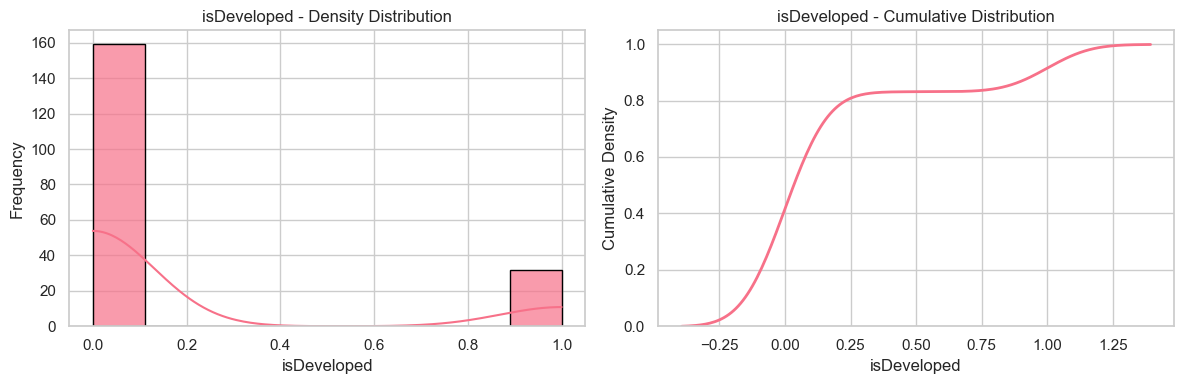

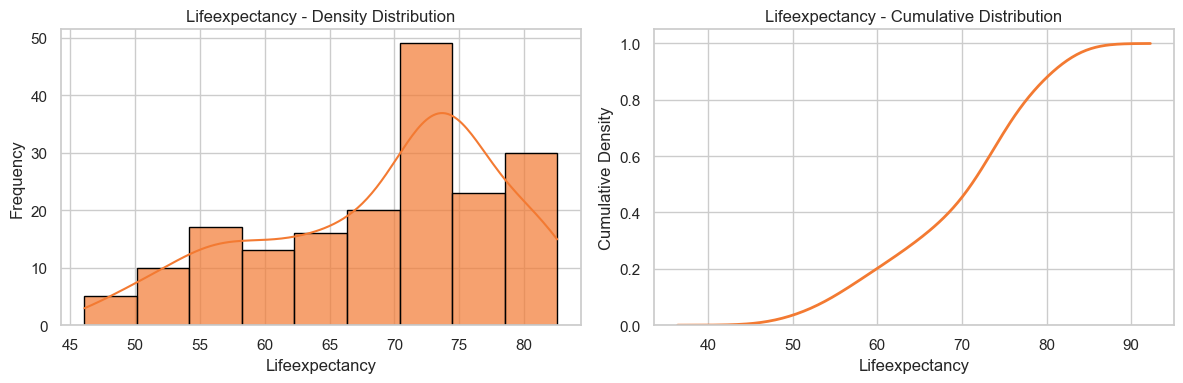

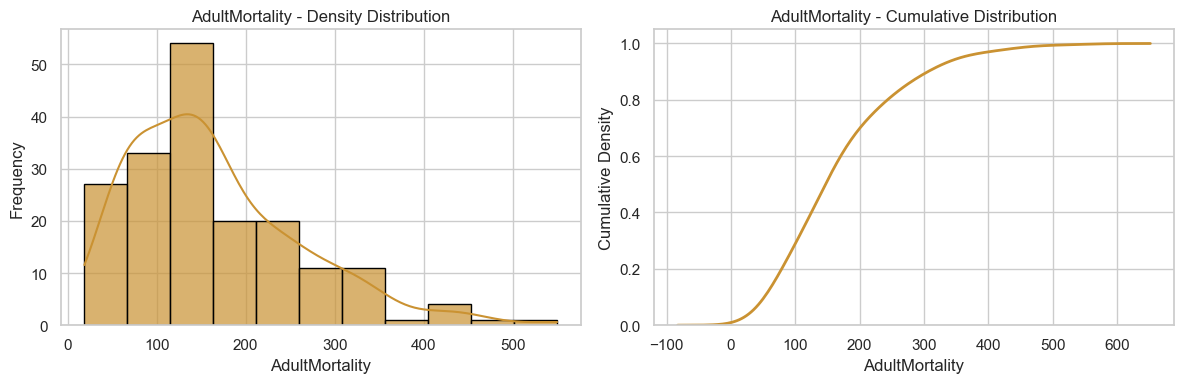

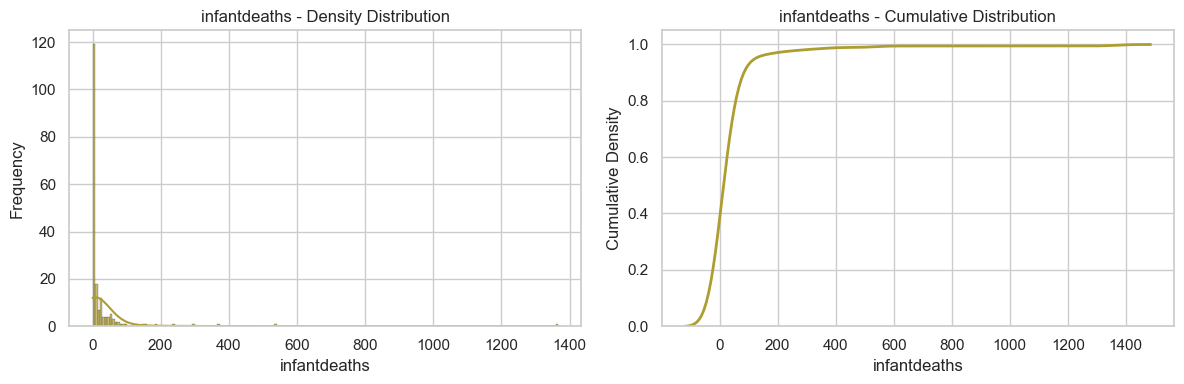

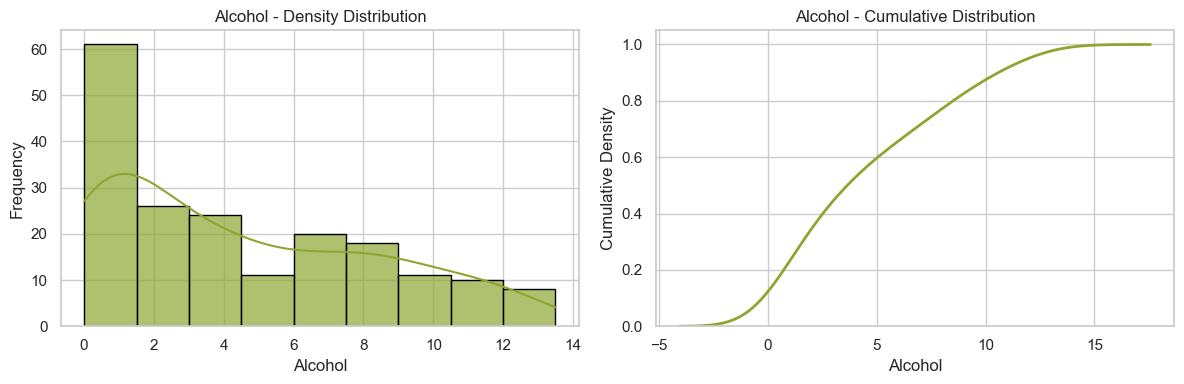

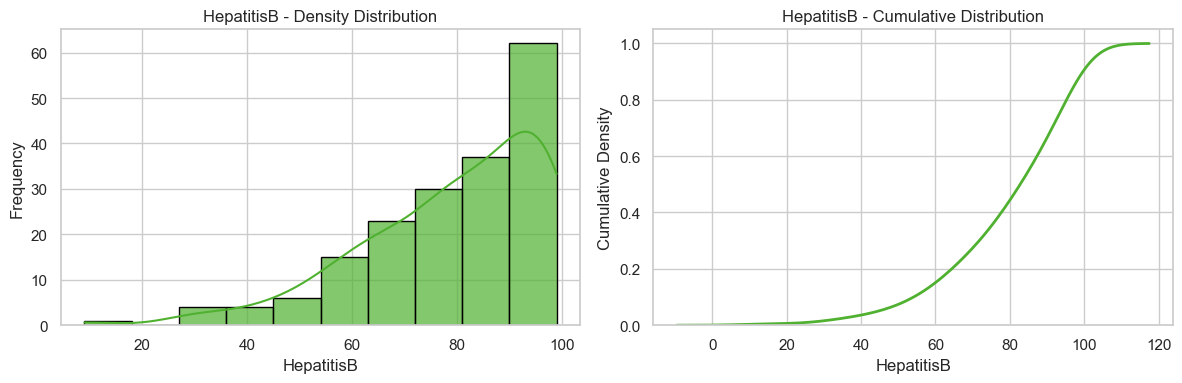

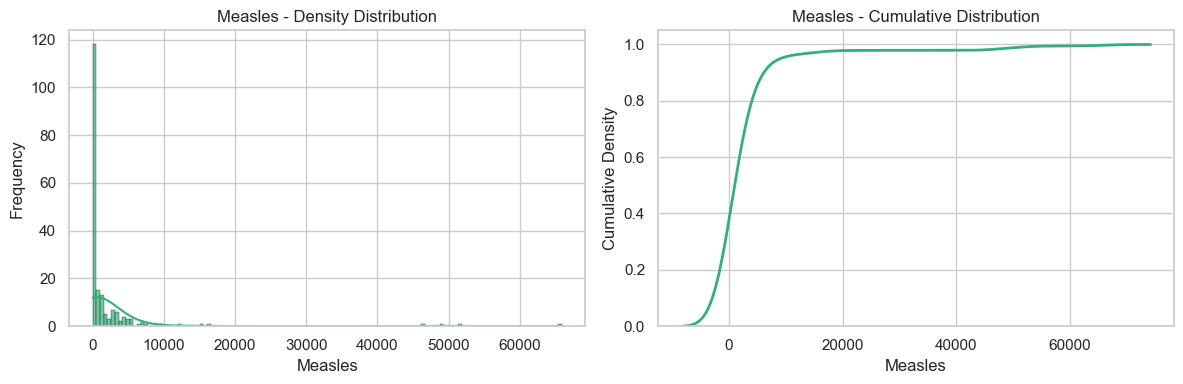

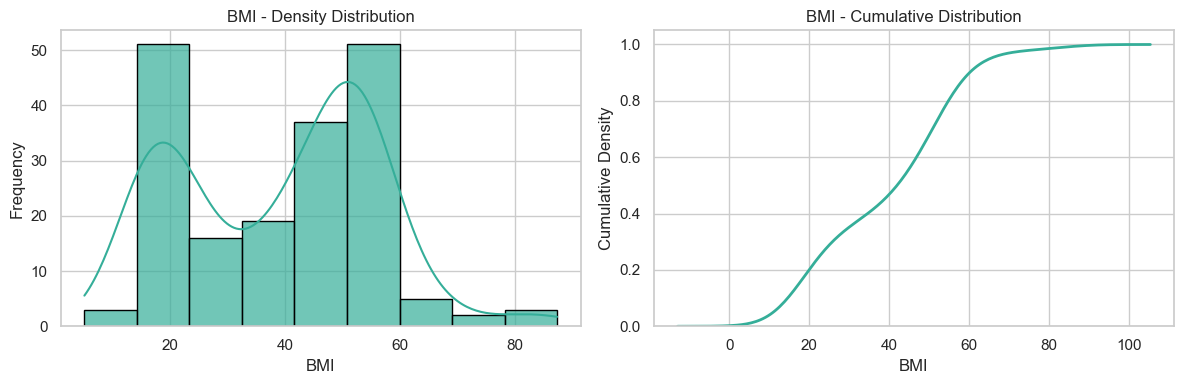

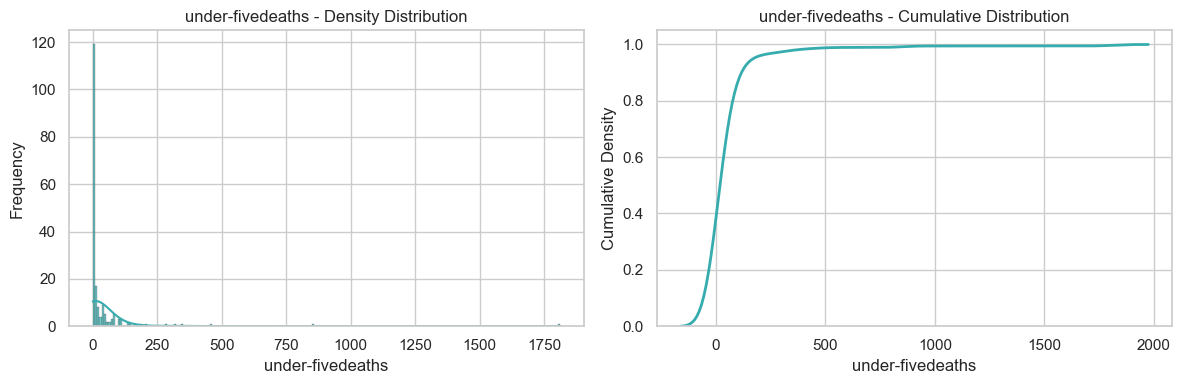

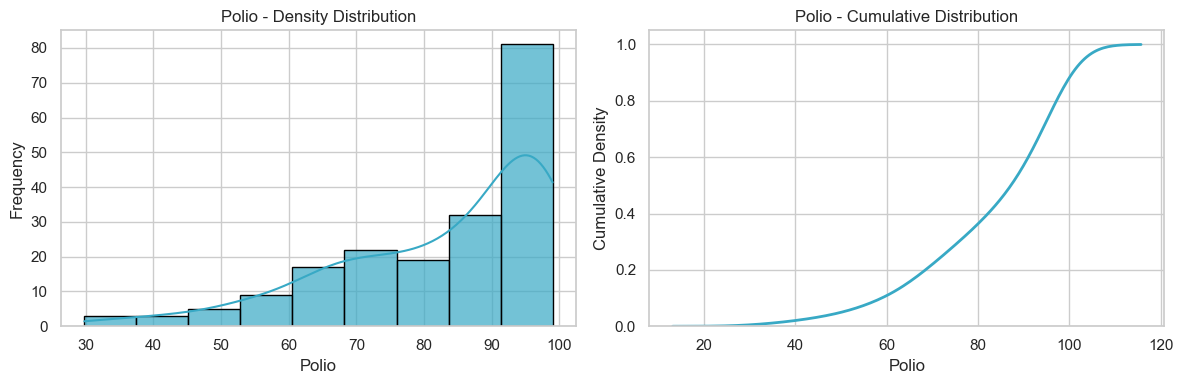

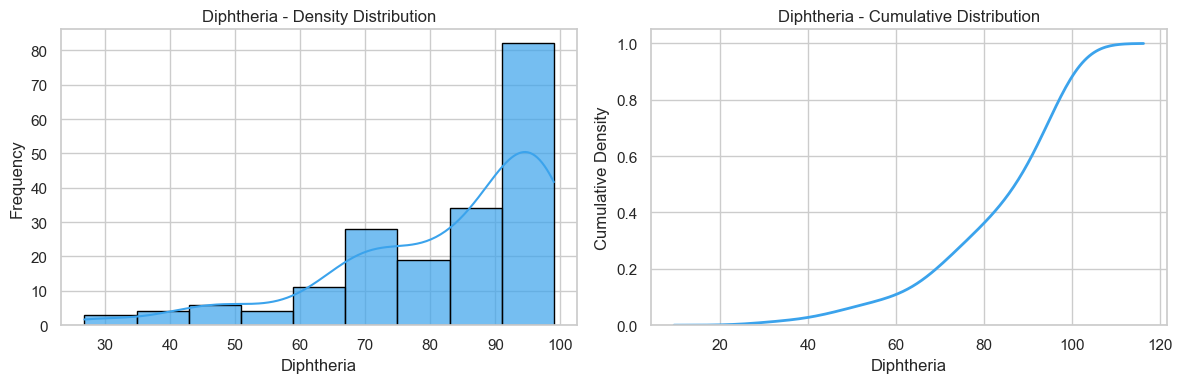

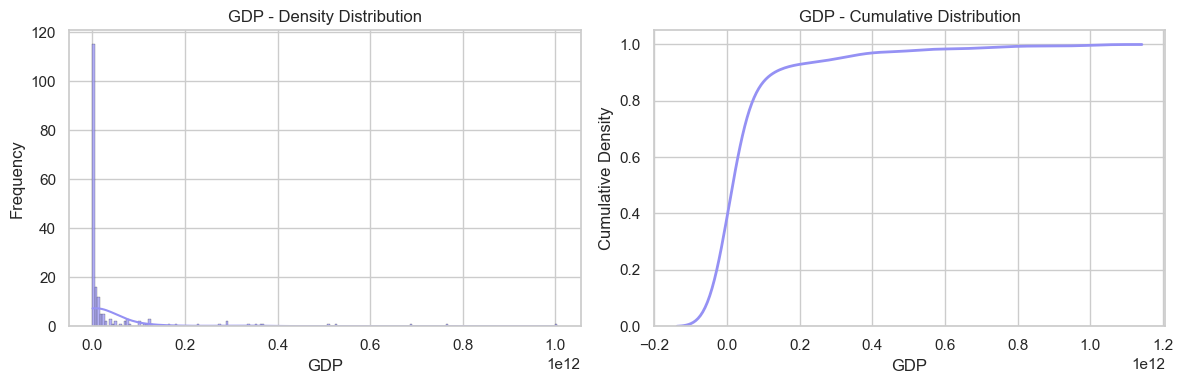

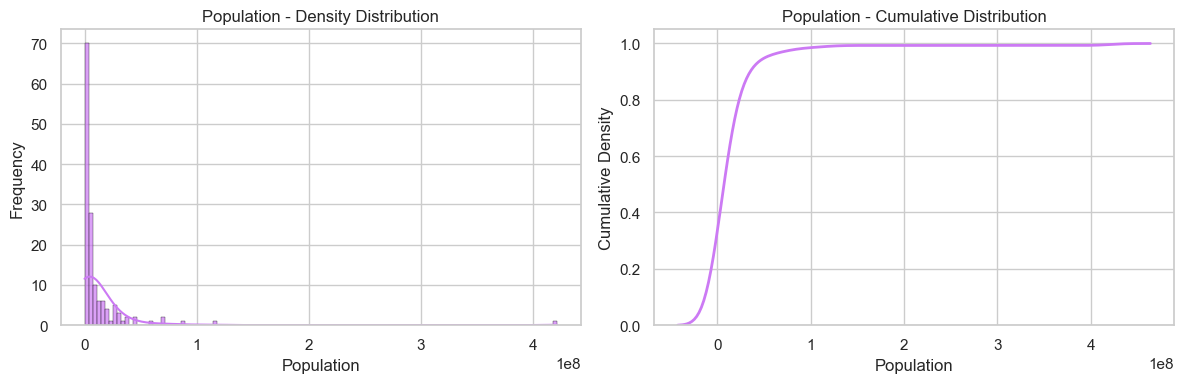

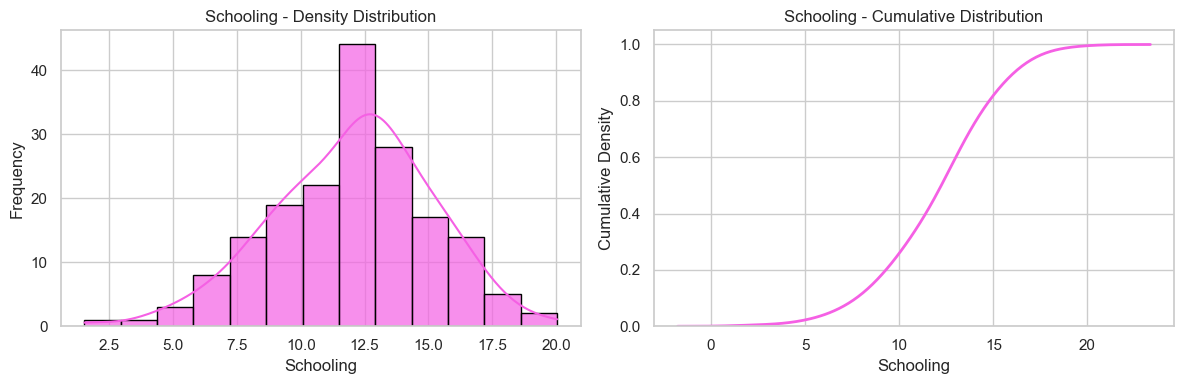

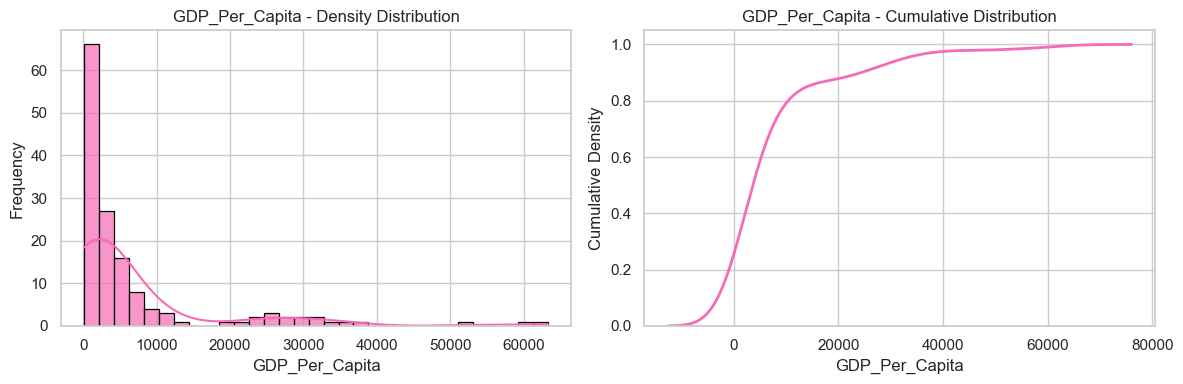

In [81]:
#Print all distributions

# Apply theme
sns.set_theme(style="whitegrid")

# Automatically select all numeric columns
numeric_cols = dfLE.select_dtypes(include=['number']).columns

# Colour palette
palette = sns.color_palette("husl", len(numeric_cols))

# Loop through each numeric column
for i, col in enumerate(numeric_cols):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Density distribution
    sns.histplot(dfLE[col], kde=True, color=palette[i],
                 edgecolor='black', alpha=0.7, ax=axes[0])
    axes[0].set(title=f'{col} - Density Distribution', xlabel=col, ylabel='Frequency')

    # Cumulative distribution
    sns.kdeplot(dfLE[col], cumulative=True, color=palette[i],
                fill=False, linewidth=2, ax=axes[1])
    axes[1].set(title=f'{col} - Cumulative Distribution', xlabel=col, ylabel='Cumulative Density')

    plt.tight_layout()
    plt.show()

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

Chosen analytical distribution: Normal
Parameters (from data, no fit()): mean = 12.028, std = 3.105


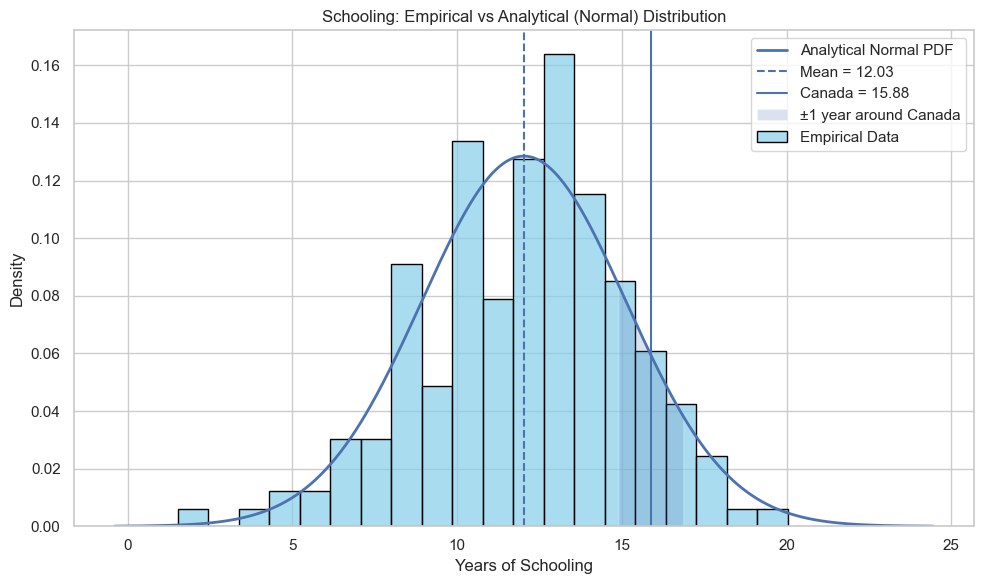

Analytical (Normal) predicted % within ±1 year of Canada: 12.03%


In [82]:
#Analytical for Schooling
sns.set_theme(style="whitegrid")

# Extract schooling data 
schooling = dfLE['Schooling'].dropna()

mu = schooling.mean()
sigma = schooling.std(ddof=1)

print(f"Chosen analytical distribution: Normal")
print(f"Parameters (from data, no fit()): mean = {mu:.3f}, std = {sigma:.3f}")

mask_canada = dfLE['Country'].astype(str).str.lower().eq('canada')
canada_schooling = dfLE.loc[mask_canada, 'Schooling'].dropna().iloc[0]

x_min = min(schooling.min(), mu - 4*sigma)
x_max = max(schooling.max(), mu + 4*sigma)
x = np.linspace(x_min, x_max, 1000)

# Manual PDF using Normal formula 
pdf = (1 / (sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Plot empirical vs analytical distribution
plt.figure(figsize=(10, 6))
sns.histplot(schooling, bins=20, kde=False, stat='density',
             color='skyblue', edgecolor='black', alpha=0.7, label='Empirical Data')

plt.plot(x, pdf, linewidth=2, label='Analytical Normal PDF')

# Annotation
plt.axvline(mu, linestyle='--', linewidth=1.5, label=f"Mean = {mu:.2f}")
plt.axvline(canada_schooling, linestyle='-', linewidth=1.5, label=f"Canada = {canada_schooling:.2f}")

lower = canada_schooling - 1
upper = canada_schooling + 1
plt.fill_between(x, 0, pdf, where=(x >= lower) & (x <= upper), alpha=0.2,
                 label="±1 year around Canada")

plt.title('Schooling: Empirical vs Analytical (Normal) Distribution')
plt.xlabel('Years of Schooling')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

# Predicted % within ±1 year of Canada (Analytical)
p_analytical = norm.cdf(upper, loc=mu, scale=sigma) - norm.cdf(lower, loc=mu, scale=sigma)

print(f"Analytical (Normal) predicted % within ±1 year of Canada: {p_analytical*100:.2f}%")

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

Log-scale mean = 7.804, std = 1.471
Chosen analytical distribution: Log-Normal (parameters estimated manually, no .fit() used


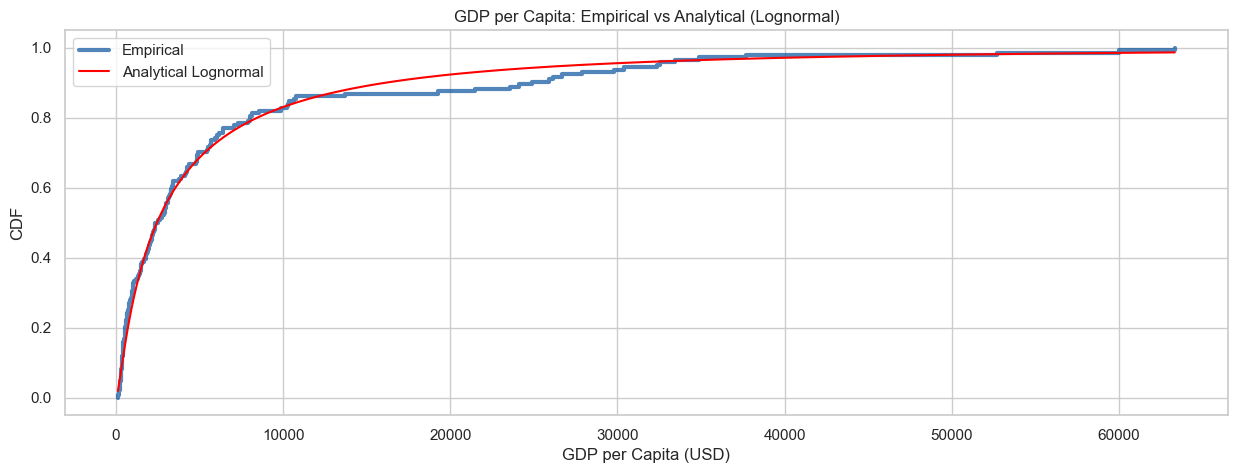

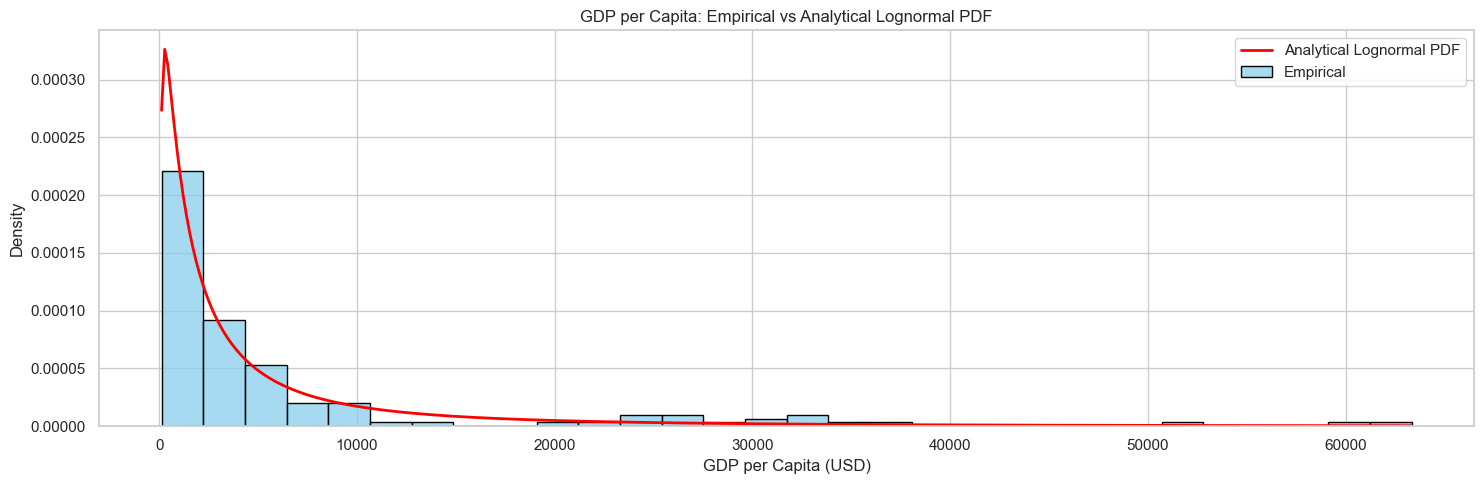

In [83]:
#Analytical for GDP/capita
sns.set_theme(style="whitegrid")

# Extract GDP per capita and remove missing or invalid values
gdp = dfLE['GDP_Per_Capita'].dropna()
gdp = gdp[gdp > 0]  # Logarithm requires positive values only

# Compute parameters for the Lognormal distribution
log_gdp = np.log(gdp)
mu = log_gdp.mean()
sigma = log_gdp.std(ddof=1)

print(f"Log-scale mean = {mu:.3f}, std = {sigma:.3f}")
print("Chosen analytical distribution: Log-Normal (parameters estimated manually, no .fit() used")

cdf_emp = thinkstats2.Cdf(gdp, label='Empirical')

xs = np.linspace(gdp.min(), gdp.max(), 400)
ys = lognorm.cdf(xs, s=sigma, scale=np.exp(mu))  # parameters: shape=sigma, scale=e^mu

# Plot empirical vs analytical CDF
thinkplot.PrePlot(2)
thinkplot.Cdf(cdf_emp, label='Empirical')
plt.plot(xs, ys, color='red', label='Analytical Lognormal')
thinkplot.Config(title='GDP per Capita: Empirical vs Analytical (Lognormal)',
                 xlabel='GDP per Capita (USD)', ylabel='CDF')
plt.legend()
plt.show()

# Compare distributions
sns.histplot(gdp, stat='density', kde=False, bins=30, color='skyblue', edgecolor='black', label='Empirical')
ys_pdf = lognorm.pdf(xs, s=sigma, scale=np.exp(mu))
plt.plot(xs, ys_pdf, color='red', linewidth=2, label='Analytical Lognormal PDF')
plt.title('GDP per Capita: Empirical vs Analytical Lognormal PDF')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

Removed countries with GDP per capita above 56,879 (extremely high but valid outliers like Luxembourg/Qatar).


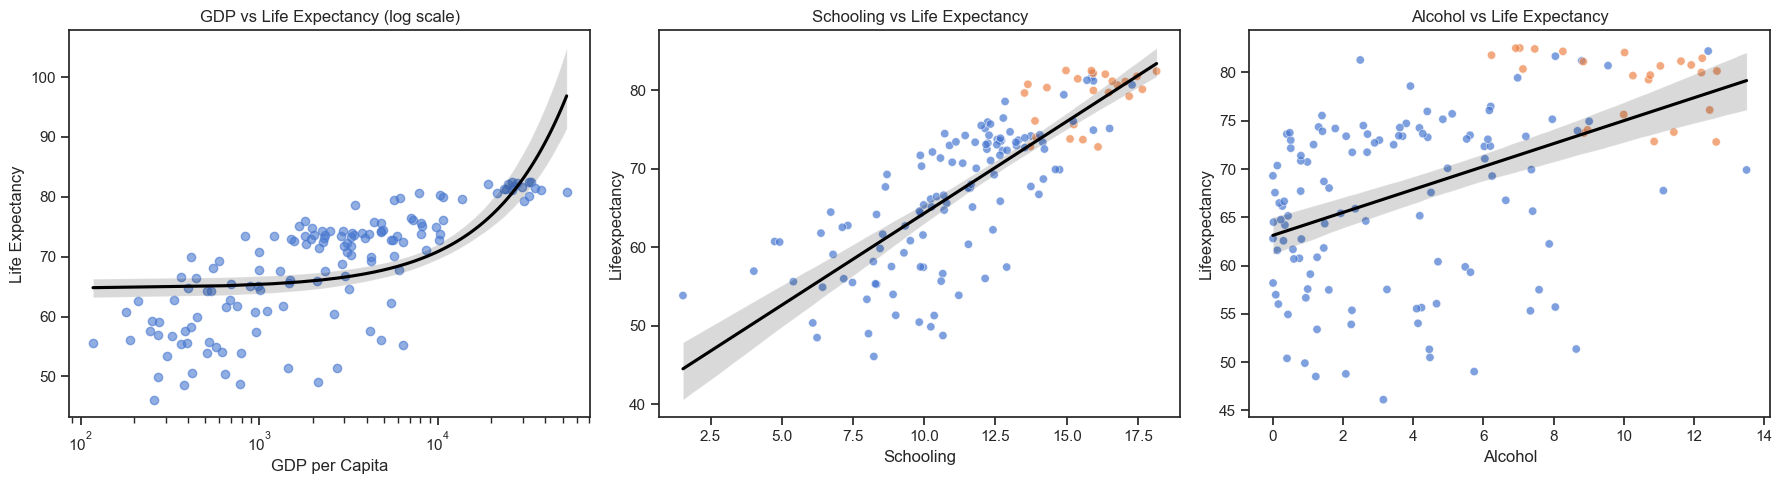


Correlation matrix (after outlier removal):


,GDP_Per_Capita,Schooling,Alcohol,Lifeexpectancy
GDP_Per_Capita,1.00,0.63,0.60,0.62
Schooling,0.63,1.00,0.69,0.80
Alcohol,0.60,0.69,1.00,0.48
Lifeexpectancy,0.62,0.80,0.48,1.00



Correlation with Life Expectancy (Developed countries):
  GDP_Per_Capita: 0.65
  Schooling: 0.43
  Alcohol: -0.36

Correlation with Life Expectancy (Developing countries):
  GDP_Per_Capita: 0.53
  Schooling: 0.73
  Alcohol: 0.26


In [84]:
#Visualize correlations. 
sns.set_theme(style="ticks", palette="muted")

# Outlier filter (remove extreme GDP values that distort trends)
gdp_cutoff = dfLE['GDP_Per_Capita'].quantile(0.99)
df_filtered = dfLE[dfLE['GDP_Per_Capita'] < gdp_cutoff]

print(f"Removed countries with GDP per capita above {gdp_cutoff:,.0f} "
      "(extremely high but valid outliers like Luxembourg/Qatar).")

# Split by development status
dev = df_filtered[df_filtered['isDeveloped'] == 1]
devg = df_filtered[df_filtered['isDeveloped'] == 0]

# Compare three key relationships with regression lines
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# GDP vs Life Expectancy
sns.regplot(data=df_filtered, x='GDP_Per_Capita', y='Lifeexpectancy',
            scatter_kws={'alpha':0.6}, line_kws={'color':'black'}, ax=axes[0])
axes[0].set_xscale('log')
axes[0].set_title('GDP vs Life Expectancy (log scale)')
axes[0].set_xlabel('GDP per Capita')
axes[0].set_ylabel('Life Expectancy')

# Schooling vs Life Expectancy
sns.scatterplot(data=df_filtered, x='Schooling', y='Lifeexpectancy',
                hue='isDeveloped', alpha=0.7, ax=axes[1], legend=False)
sns.regplot(data=df_filtered, x='Schooling', y='Lifeexpectancy',
            scatter=False, color='black', ax=axes[1])
axes[1].set_title('Schooling vs Life Expectancy')

# Alcohol vs Life Expectancy
sns.scatterplot(data=df_filtered, x='Alcohol', y='Lifeexpectancy',
                hue='isDeveloped', alpha=0.7, ax=axes[2], legend=False)
sns.regplot(data=df_filtered, x='Alcohol', y='Lifeexpectancy',
            scatter=False, color='black', ax=axes[2])
axes[2].set_title('Alcohol vs Life Expectancy')

plt.tight_layout()
plt.show()

# Show correlation values (numeric summary)
cols = ['GDP_Per_Capita', 'Schooling', 'Alcohol', 'Lifeexpectancy']
corr_all = df_filtered[cols].corr().round(2)
print("\nCorrelation matrix (after outlier removal):")
display(corr_all)

# Separate correlation comparison — cleaner output
corr_dev = dev[cols].corr().loc['Lifeexpectancy'].round(2)
corr_devg = devg[cols].corr().loc['Lifeexpectancy'].round(2)

print("\nCorrelation with Life Expectancy (Developed countries):")
for col, val in corr_dev.items():
    if col != 'Lifeexpectancy':
        print(f"  {col}: {val}")

print("\nCorrelation with Life Expectancy (Developing countries):")
for col, val in corr_devg.items():
    if col != 'Lifeexpectancy':
        print(f"  {col}: {val}")

Outliers above the 99th percentile of GDP per Capita were removed to avoid skewing correlations.
Among developing countries, GDP and schooling both show a strong positive correlation with life expectancy.
Among developed countries, the relationship flattens (diminishing returns).
Alcohol consumption shows weaker, less consistent correlation across both groups.

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [85]:
#Calculate correlations and analyze. 

# Separate developed vs developing
developed = dfLE[dfLE['isDeveloped'] == 1]
developing = dfLE[dfLE['isDeveloped'] == 0]

# Compute correlations with Lifeexpectancy
corr_dev = developed.corr(numeric_only=True)['Lifeexpectancy'].drop('Lifeexpectancy').sort_values(ascending=False)
corr_devg = developing.corr(numeric_only=True)['Lifeexpectancy'].drop('Lifeexpectancy').sort_values(ascending=False)

# Make the dispplay better
corr_dev_df = corr_dev.head(3).reset_index()
corr_dev_df.columns = ['Variable', 'Correlation']

corr_devg_df = corr_devg.head(3).reset_index()
corr_devg_df.columns = ['Variable', 'Correlation']

print("Top 3 correlations with Life Expectancy (Developed countries):")
display(corr_dev_df)

print("Top 3 correlations with Life Expectancy (Developing countries):")
display(corr_devg_df)

# Showing strongest negative correlations
corr_dev_neg = corr_dev.tail(3).reset_index()
corr_dev_neg.columns = ['Variable', 'Correlation']

corr_devg_neg = corr_devg.tail(3).reset_index()
corr_devg_neg.columns = ['Variable', 'Correlation']

print("Strongest negative correlations (Developed countries):")
display(corr_dev_neg)

print("Strongest negative correlations (Developing countries):")
display(corr_devg_neg)

Top 3 correlations with Life Expectancy (Developed countries):


,Variable,Correlation
0,GDP_Per_Capita,0.628680
1,Schooling,0.417589
2,GDP,0.372168


Top 3 correlations with Life Expectancy (Developing countries):


,Variable,Correlation
0,Schooling,0.735940
1,BMI,0.694751
2,Diphtheria,0.650166


Strongest negative correlations (Developed countries):


,Variable,Correlation
0,HepatitisB,-0.462585
1,AdultMortality,-0.883067
2,isDeveloped,NaN


Strongest negative correlations (Developing countries):


,Variable,Correlation
0,under-fivedeaths,-0.196396
1,AdultMortality,-0.875761
2,isDeveloped,NaN


For developed countries, the strongest correlations with life expectancy are Schooling, GDP per Capita, and Polio immunization.
For developing countries, the top factors are GDP per Capita, Schooling, and Diphtheria immunization.
These results make sense in reality as income, and vaccination access all directly improve public health. 